# Задания для Семинара 2

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

Выполнил:  
**Вольхин Данил Федорович**

Email:  
[dfvolkhin@edu.hse.ru](mailto:dfvolkhin@edu.hse.ru)

Дата:  
**30 января 2025**

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

😊 Первый раз в жизни делаю посадку на юпитер 😊

## ANSI коды для цветов текста

In [1]:
RED = "\033[31m"
GREEN = "\033[32m"
YELLOW = "\033[33m"
BLUE = "\033[34m"
RESET = "\033[0m"  # сброс цветов до стандартных

## Шаблоны markdown

<span style="color: green;"># Это комментарий в коде</span><br>
<span style="color: blue;">def</span> greet(name):<br>
<span style="color: red;">print</span>(f"Hello, {name}!")
<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">
<pre style="background-color: #F5F5F5; padding: 10px; border-radius: 5px; font-family: monospace;">code</pre>

## Установка библиотек

In [2]:
# !pip install torch==1.12.1+cu116 torchvision==0.13.1+cu116 --index-url https://download.pytorch.org/whl/cu116
# !pip install tensorboard==2.10.1 tensorflow==2.10.0
# !pip install pydantic==2.10.3
# !pip install tqdm==4.66.2
# !pip install scikit-learn==1.5.1
# !pip install scipy==1.13.1
# !pip install seaborn==0.13.2
# !pip install rich==13.7.1
# !pip install requests==2.32.3
# !pip install pillow==10.4.0
# !pip install pandas==2.2.2
# !pip install matplotlib==3.9.2
# !pip install duckdb==1.1.0
# !pip install annotated-types==0.7.0

# Подготовка к написанию кода

## Импорт библиотек

In [3]:
print(f"{YELLOW}"+60*"-"+f"{RESET}")
print(f"Библиотеки: \n")

# Дополнительные библиотеки
import platform # Узнать версию пайтона ;)
import os
import logging
import time
import sys
import random
import re
import shutil
from tqdm import tqdm
from functools import wraps
from typing import Any, Tuple, Union, Optional, List, Type, Callable, Dict
from collections import Counter
import zipfile
from dataclasses import dataclass
import requests

# Основные библиотеки
import IPython.display as ipd # Добавляет виджеты для ячеек юпитера
from IPython.display import HTML
from IPython import get_ipython
import ipykernel
print(f"python: {BLUE}{platform.python_version()}{RESET} ")
import matplotlib # Для рисунков
import matplotlib.pyplot as plt
print(f"matplotlib: {BLUE}{matplotlib.__version__}{RESET}")
import numpy as np # Для работы с массивами
print(f"numpy: {BLUE}{np.__version__}{RESET}")
import pandas as pd # Работа с таблицами
print(f"pandas: {BLUE}{pd.__version__}{RESET}")
import sklearn # Много полезного для ML
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.cluster import KMeans
print(f"sklearn: {BLUE}{sklearn.__version__}{RESET}")
import scipy
print(f"scipy: {BLUE}{scipy.__version__}{RESET}")
import pydantic # Для валидации данных
from pydantic import (BaseModel, Field, StrictStr, condecimal, StrictInt, StrictBool,
                      FilePath, DirectoryPath, ValidationError, root_validator, ConfigDict)
print(f"pydantic: {BLUE}{pydantic.__version__}{RESET}")
import fastapi
from fastapi import HTTPException, status
print(f"fastapi: {BLUE}{fastapi.__version__}{RESET}")
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import DataLoader, Subset, WeightedRandomSampler
print(f"torch: {BLUE}{torch.__version__}{RESET}")
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import torchvision.models as models
print(f"torchvision: {BLUE}{torchvision.__version__}{RESET}")
import requests
print(f"requests: {BLUE}{requests.__version__}{RESET}")
import PIL
from PIL import Image, ImageEnhance
print(f"Pillow: {BLUE}{PIL.__version__}{RESET}")
import cv2
print(f"OpenCV: {BLUE}{cv2.__version__}{RESET}")

from rich.theme import Theme
from rich.logging import RichHandler
from rich.console import Console
from rich.pretty import install as pretty_install
from rich.traceback import install as traceback_install


print(f"{YELLOW}"+60*"-"+f"{RESET}")

------------------------------------------------------------
Библиотеки: 

python: 3.9.16 
matplotlib: 3.9.2
numpy: 1.26.4
pandas: 2.2.2
sklearn: 1.5.1
scipy: 1.13.1
pydantic: 2.10.3
fastapi: 0.115.7


C:\Users\NightMare\PycharmProjects\CVtools\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch: 1.12.1+cu116
torchvision: 0.13.1+cu116
requests: 2.32.3
Pillow: 10.4.0
OpenCV: 4.11.0
------------------------------------------------------------


## Дополнительные настройки

In [4]:
import warnings
warnings.filterwarnings("ignore")
import logging
# Отключение логирования для cmdstanpy
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)
# Полезна при разработке собственных библиотек, юпитер будет переимпортировать модули, если в них были изменения
%load_ext autoreload
%autoreload 1

## Кастомный setup_logging

In [5]:
log = None

def setup_logging(clean=False, debug=False):
    global log

    if log is not None:
        return log

    try:
        if clean and os.path.isfile('setup.log'):
            os.remove('setup.log')
        time.sleep(0.1)  # prevent race condition
    except:
        pass

    if sys.version_info >= (3, 9):
        logging.basicConfig(level=logging.DEBUG, format='%(asctime)s | %(levelname)s | %(pathname)s | %(message)s',
                            filename='setup.log', filemode='a', encoding='utf-8', force=True)
    else:
        logging.basicConfig(level=logging.DEBUG, format='%(asctime)s | %(levelname)s | %(pathname)s | %(message)s',
                            filename='setup.log', filemode='a', force=True)

    console = Console(log_time=True, log_time_format='%H:%M:%S-%f', theme=Theme({
        "traceback.border": "black",
        "traceback.border.syntax_error": "black",
        "inspect.value.border": "black",
    }))
    pretty_install(console=console)
    traceback_install(console=console, extra_lines=1, width=console.width, word_wrap=False, indent_guides=False,
                      suppress=[])
    rh = RichHandler(show_time=True, omit_repeated_times=False, show_level=True, show_path=False, markup=False,
                     rich_tracebacks=True, log_time_format='%H:%M:%S-%f',
                     level=logging.DEBUG if debug else logging.INFO, console=console)
    rh.set_name(logging.DEBUG if debug else logging.INFO)
    log = logging.getLogger("sd")
    log.addHandler(rh)

    return log

In [6]:
log = setup_logging()

## Валидация входящих данных для каждого класса

### validate_with_pydantic

In [7]:
def validate_with_pydantic(model_cls):
    """
    Декоратор для валидации данных с использованием Pydantic-модели.
    """

    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            # Проверяем данные в аргументах функции
            try:
                data = kwargs.get("entry", args[0] if args else None)
                if not data:
                    raise HTTPException(status_code=status.HTTP_400_BAD_REQUEST,
                                        detail="No data provided for validation.")
                # Валидация данных
                if isinstance(data, BaseModel):
                    data = data.dict(by_alias=True)
                validated_data = model_cls(**data)
                # Передаем валидированные данные дальше
                kwargs["entry"] = validated_data
                return func(*args, **kwargs)
            except ValidationError as ve:
                log.exception("Validation failed", exc_info=ve)
                raise HTTPException(status_code=status.HTTP_400_BAD_REQUEST,
                                    detail="Invalid data for Pydantic model.") from ve

        return wrapper

    return decorator

### auto_generate_docstring

In [8]:
def auto_generate_docstring(cls: Type[BaseModel]) -> Type[BaseModel]:
    """
    Декоратор для автоматического добавления docstring в классы Pydantic.
    """

    def generate_docstring(model: Type[BaseModel]) -> str:
        """
        Генерация строки документации из описания полей модели Pydantic.
        """
        docstring = []
        for field_name, field_info in model.__fields__.items():
            field_details = f"Field '{field_name}':\n"
            if field_info.description:  # Получение описания
                field_details += f"  Description: {field_info.description}\n"
            if field_info.examples:  # Получение примеров
                field_details += f"  Examples: {field_info.examples}\n"
            docstring.append(field_details)
        return "\n".join(docstring)

    # Добавляем описание к существующему docstring
    cls.__doc__ = (cls.__doc__ or "") + "\n\n" + generate_docstring(cls)
    return cls

# Функции определенные на Семинаре 1

## Функция для сохранения изображения в папку

In [9]:
def download_image(url: str, folder_name: str, filename: str = "image.jpg"):
    os.makedirs(folder_name, exist_ok=True)
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        image_path = os.path.join(folder_name, filename)
        with open(image_path, 'wb') as file:
            for chunk in response.iter_content(1024):
                file.write(chunk)
        log.info(f"Изображение сохранено: {image_path}")
    else:
        log.error(f"Ошибка загрузки изображения, статус: {response.status_code}")

In [10]:
#download_image("https://image.civitai.com/xG1nkqKTMzGDvpLrqFT7WA/2ac05362-b7b0-4d82-ae61-f827d47b6ae0/original=true,quality=90/54114847.jpeg",
#               "./cv_seminar_1",
#               "example.jpg")

## Функция для загрузки и отображения с помощью OpenCV | PIL

In [11]:
def imgop(path_to_img, lib: str = "cv2", show: bool = False, show_jupyter: bool = False, fixed_size: tuple = (300, 300), grayscale: bool = False):
    liblist = ["cv2", "PIL"]
    
    assert lib in liblist, f"Некорректное значение lib: {lib}. Доступные варианты: {liblist}"
    
    if not os.path.exists(path_to_img):
        log.error("Проверьте, что изображение существует")
        return None
    
    try:
        if lib == "cv2":
            flag = cv2.IMREAD_GRAYSCALE if grayscale else cv2.IMREAD_COLOR
            img = cv2.imread(path_to_img, flag)
            if img is None:
                raise ValueError("Не удалось загрузить изображение с помощью OpenCV.")
            if show:
                cv2.imshow("Image", img)
                cv2.waitKey(0)
                cv2.destroyAllWindows()
            if show_jupyter:
                if grayscale:
                    ipd.display(HTML(f'<img src="{path_to_img}" width="{fixed_size[0]}" height="{fixed_size[1]}" style="filter: grayscale(100%);">'))
                else:
                    ipd.display(HTML(f'<img src="{path_to_img}" width="{fixed_size[0]}" height="{fixed_size[1]}">'))
        elif lib == "PIL":
            img = Image.open(path_to_img)
            if grayscale:
                img = img.convert("L")
            if show:
                img.show()
            if show_jupyter:
                if grayscale:
                    ipd.display(HTML(f'<img src="{path_to_img}" width="{fixed_size[0]}" height="{fixed_size[1]}" style="filter: grayscale(100%);">'))
                else:
                    ipd.display(HTML(f'<img src="{path_to_img}" width="{fixed_size[0]}" height="{fixed_size[1]}">'))
        return img
    except Exception as ex:
        log.exception("Ошибка при обработке изображения", exc_info=ex)
        return None

In [12]:
# img = imgop("./cv_seminar2", lib="cv2")

## Функция для разделения изображения на три канала

In [13]:
def splitchenal(
    img: Union[np.ndarray, Image.Image],
    lib: str = "cv2",
    show_jupyter: bool = False,
    save_path: str = "./",
    color_space: str = "RGB",
):

    # Проверка корректности параметров
    liblist = ["cv2", "PIL"]
    assert lib in liblist, log.error(f"Некорректное значение lib: {lib}. Доступные варианты: {liblist}")
    assert color_space in ["RGB", "HSV", "LAB", "GRAY"], log.error("Некорректное цветовое пространство. Доступные варианты: RGB, HSV, LAB, GRAY.")

    # Создание директории для сохранения, если она не существует
    os.makedirs(save_path, exist_ok=True)

    # Преобразование изображения в numpy.ndarray, если это PIL.Image
    if lib == "cv2":
        if isinstance(img, Image.Image):  # Если изображение в формате PIL
            img = np.array(img)  # Преобразуем PIL.Image в numpy.ndarray
            if img.ndim == 3 and img.shape[2] == 4:  # Если изображение RGBA
                img = cv2.cvtColor(img, cv2.COLOR_RGBA2BGR)  # Преобразуем RGBA в BGR
            elif img.ndim == 3 and img.shape[2] == 3:  # Если изображение RGB
                img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Преобразуем RGB в BGR
        elif isinstance(img, np.ndarray):  # Если изображение уже в формате OpenCV
            if img.ndim == 3 and img.shape[2] == 4:  # Если изображение BGRA
                img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)  # Преобразуем BGRA в BGR
    elif lib == "PIL":
        if isinstance(img, np.ndarray):  # Если изображение в формате OpenCV
            if img.ndim == 3 and img.shape[2] == 3:  # Если изображение BGR
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Преобразуем BGR в RGB
                img = Image.fromarray(img)  # Преобразуем numpy.ndarray в PIL.Image
            elif img.ndim == 3 and img.shape[2] == 4:  # Если изображение BGRA
                img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)  # Преобразуем BGRA в RGB
                img = Image.fromarray(img)  # Преобразуем numpy.ndarray в PIL.Image
        elif isinstance(img, Image.Image):  # Если изображение уже в формате PIL
            pass  # Оставляем как есть

    # Преобразование изображения в нужное цветовое пространство
    if lib == "cv2":
        if color_space == "HSV":
            img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        elif color_space == "LAB":
            img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        elif color_space == "GRAY":
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    elif lib == "PIL":
        if color_space == "HSV":
            img = img.convert("HSV")
        elif color_space == "LAB":
            img = img.convert("LAB")
        elif color_space == "GRAY":
            img = img.convert("L")

    # Разделение каналов
    if color_space == "GRAY":
        channels = {"Gray": img}
    else:
        if lib == "cv2":
            channels_split = cv2.split(img)
        elif lib == "PIL":
            channels_split = img.split()
        channel_names = {
            "RGB": ["Blue", "Green", "Red"],
            "HSV": ["Hue", "Saturation", "Value"],
            "LAB": ["Luminance", "A", "B"],
        }[color_space]
        channels = {name: ch for name, ch in zip(channel_names, channels_split)}

    # Сохранение и отображение каналов
    for color, ch_img in channels.items():
        if lib == "cv2":
            if color_space == "GRAY":
                path = os.path.join(save_path, f"{color}_channel.jpg")
                cv2.imwrite(path, ch_img)
            else:
                zeros = np.zeros_like(ch_img)  # Черный канал
                if color_space == "RGB":
                    if color == "Blue":
                        merged = cv2.merge([ch_img, zeros, zeros])
                    elif color == "Green":
                        merged = cv2.merge([zeros, ch_img, zeros])
                    elif color == "Red":
                        merged = cv2.merge([zeros, zeros, ch_img])
                elif color_space == "HSV":
                    if color == "Hue":
                        merged = cv2.merge([ch_img, zeros, zeros])
                    elif color == "Saturation":
                        merged = cv2.merge([zeros, ch_img, zeros])
                    elif color == "Value":
                        merged = cv2.merge([zeros, zeros, ch_img])
                elif color_space == "LAB":
                    if color == "Luminance":
                        merged = cv2.merge([ch_img, zeros, zeros])
                    elif color == "A":
                        merged = cv2.merge([zeros, ch_img, zeros])
                    elif color == "B":
                        merged = cv2.merge([zeros, zeros, ch_img])
                path = os.path.join(save_path, f"{color}_channel.jpg")
                cv2.imwrite(path, merged)
        elif lib == "PIL":
            if color_space == "GRAY":
                path = os.path.join(save_path, f"{color}_channel.jpg")
                ch_img.save(path)
            else:
                zeros = Image.new("L", img.size, 0)
                if color_space == "RGB":
                    if color == "Blue":
                        merged = Image.merge("RGB", (ch_img, zeros, zeros))
                    elif color == "Green":
                        merged = Image.merge("RGB", (zeros, ch_img, zeros))
                    elif color == "Red":
                        merged = Image.merge("RGB", (zeros, zeros, ch_img))
                elif color_space == "HSV":
                    if color == "Hue":
                        merged = Image.merge("HSV", (ch_img, zeros, zeros))
                    elif color == "Saturation":
                        merged = Image.merge("HSV", (zeros, ch_img, zeros))
                    elif color == "Value":
                        merged = Image.merge("HSV", (zeros, zeros, ch_img))
                elif color_space == "LAB":
                    if color == "Luminance":
                        merged = Image.merge("LAB", (ch_img, zeros, zeros))
                    elif color == "A":
                        merged = Image.merge("LAB", (zeros, ch_img, zeros))
                    elif color == "B":
                        merged = Image.merge("LAB", (zeros, zeros, ch_img))
                path = os.path.join(save_path, f"{color}_channel.jpg")
                merged.save(path)

        # Отображение в Jupyter Notebook
        if show_jupyter:
            ipd.display(ipd.HTML(f'<img src="{path}" width="300">'))

    return channels

In [14]:
# channels = splitchenal(img, lib="cv2", show_jupyter=True, save_path="./")

## Функция для изменения размера и обрезки изображения

In [15]:
def imgproc(img: Union[np.ndarray, Image.Image], lib="cv2", save_path="./", show_jupyter: bool = False):
    liblist = ["cv2", "PIL"]
    assert lib in liblist, log.error(f"Некорректное значение lib: {lib}. Доступные варианты: {liblist}")
    
    os.makedirs(save_path, exist_ok=True)
    
    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Ожидается изображение формата OpenCV (numpy.ndarray).")
        img_resized = cv2.resize(img, (300, 300))
        start = (300 - 200) // 2
        img_cropped = img_resized[start:start + 200, start:start + 200]

        resized_path = os.path.join(save_path, "cv2_resized.jpg")
        cropped_path = os.path.join(save_path, "cv2_cropped.jpg")
        cv2.imwrite(resized_path, img_resized)
        cv2.imwrite(cropped_path, img_cropped)

    elif lib == "PIL":
        if not isinstance(img, Image.Image):
            raise ValueError("Ожидается изображение формата PIL (Image.Image).")
        img_resized = img.resize((300, 300))
        start = (300 - 200) // 2
        img_cropped = img_resized.crop((start, start, start + 200, start + 200))

        resized_path = os.path.join(save_path, "PIL_resized.jpg")
        cropped_path = os.path.join(save_path, "PIL_cropped.jpg")
        img_resized.save(resized_path)
        img_cropped.save(cropped_path)

    if show_jupyter:
        ipd.display(HTML(f'<img src="{resized_path}">'))
        ipd.display(HTML(f'<img src="{cropped_path}">'))

    return img_resized, img_cropped

In [16]:
# resized_cv2, cropped_cv2 = imgproc(img, lib="cv2", show_jupyter=True)

## Функция для поворота изображения на заданный угол

In [17]:
def imgrot(img: Union[np.ndarray, Image.Image], angle: float, lib: str = "cv2", save_path="./", 
                 show_jupyter: bool = False, fixed_size: tuple = (300, 300)):
    liblist = ["cv2", "PIL"]
    assert lib in liblist, log.error(f"Некорректное значение lib: {lib}. Доступные варианты: {liblist}")
    
    os.makedirs(save_path, exist_ok=True)
    
    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Ожидается изображение формата OpenCV (numpy.ndarray).")
        
        (h, w) = img.shape[:2]
        center = (w // 2, h // 2)
        
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated_img = cv2.warpAffine(img, rotation_matrix, (w, h))
        
        rotated_resized = cv2.resize(rotated_img, fixed_size)
        save_file = os.path.join(save_path, f"cv2_rotated_{angle}.jpg")
        cv2.imwrite(save_file, rotated_resized)
    
    elif lib == "PIL":
        if not isinstance(img, Image.Image):
            raise ValueError("Ожидается изображение формата PIL (Image.Image).")
        
        rotated_img = img.rotate(-angle, expand=True)
        rotated_resized = rotated_img.resize(fixed_size)
        
        save_file = os.path.join(save_path, f"PIL_rotated_{angle}.jpg")
        rotated_resized.save(save_file)

    if show_jupyter:
        ipd.display(HTML(f'<img src="{save_file}" width="{fixed_size[0]}" height="{fixed_size[1]}">'))
    
    return rotated_resized

## Функция для изменения контрастности и яркости

In [18]:
def adjbrincont(img: Union[np.ndarray, Image.Image], brightness: float = 1.0, contrast: float = 0.0, 
                               lib: str = "cv2", save_path="./", show_jupyter: bool = False, fixed_size: tuple = (300, 300)):
    liblist = ["cv2", "PIL"]
    assert lib in liblist, log.error(f"Некорректное значение lib: {lib}. Доступные варианты: {liblist}")
    
    os.makedirs(save_path, exist_ok=True)

    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Ожидается изображение формата OpenCV (numpy.ndarray).")
        
        contrast_factor = (contrast / 100) + 1  # Преобразуем процент в коэффициент (50% → 1.5)
        img = cv2.convertScaleAbs(img, alpha=contrast_factor, beta=(brightness - 1) * 100)
        
        save_file = os.path.join(save_path, f"cv2_b{brightness}_c{contrast}.jpg")
        cv2.imwrite(save_file, img)

    elif lib == "PIL":
        if not isinstance(img, Image.Image):
            raise ValueError("Ожидается изображение формата PIL (Image.Image).")
        
        img = ImageEnhance.Brightness(img).enhance(brightness)
        contrast_factor = (contrast / 100) + 1  # Преобразуем процент в коэффициент
        img = ImageEnhance.Contrast(img).enhance(contrast_factor)
    
        save_file = os.path.join(save_path, f"PIL_b{brightness}_c{contrast}.jpg")
        img.save(save_file)

    if show_jupyter:
        ipd.display(HTML(f'<img src="{save_file}" width="{fixed_size[0]}" height="{fixed_size[1]}">'))

    return img

## Функция для вычисления гистограммы интенсивности пикселей

In [19]:
def hist(
    img: Union[np.ndarray, Image.Image],
    color_space: str = "RGB",
    save_path: str = "./",
    show_jupyter: bool = False,
    lib: str = "cv2",
    channel: Optional[str] = None,  # Новый аргумент: конкретный канал
):
    # Проверка корректности параметров
    assert lib in ["cv2", "PIL"], "Некорректное значение lib. Доступные варианты: cv2, PIL."
    assert color_space in ["RGB", "HSV", "LAB", "GRAY"], "Некорректное цветовое пространство. Доступные варианты: RGB, HSV, LAB, GRAY."
    
    # Словарь допустимых каналов для каждого цветового пространства
    valid_channels = {
        "RGB": ["R", "G", "B"],
        "HSV": ["H", "S", "V"],
        "LAB": ["L", "A", "B"],
        "GRAY": ["Gray"]
    }
    
    # Проверка корректности канала (если указан)
    if channel is not None:
        assert channel in valid_channels[color_space], (
            f"Некорректный канал '{channel}' для пространства {color_space}. "
            f"Допустимые каналы: {valid_channels[color_space]}"
        )

    # Создание директории для сохранения
    os.makedirs(save_path, exist_ok=True)

    # Преобразование изображения в numpy.ndarray для OpenCV
    if isinstance(img, Image.Image) and lib == "cv2":
        img = np.array(img)
        if img.ndim == 3 and img.shape[2] == 4:  # Если изображение RGBA, преобразуем в RGB
            img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
    elif lib == "cv2" and not isinstance(img, Image.Image):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Конвертируем BGR в RGB для OpenCV

    # Преобразование в нужное цветовое пространство
    if lib == "cv2":
        if color_space == "HSV":
            img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == "LAB":
            img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
        elif color_space == "GRAY":
            img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    elif lib == "PIL":
        if color_space == "HSV":
            img = img.convert("HSV")
        elif color_space == "LAB":
            img = img.convert("LAB")
        elif color_space == "GRAY":
            img = img.convert("L")

    # Разделение каналов
    if color_space == "GRAY":
        channels = [img]
        channel_names = ["Gray"]
    else:
        if lib == "cv2":
            channels = cv2.split(img)
        elif lib == "PIL":
            channels = img.split()
        channel_names = valid_channels[color_space]

    # Выбор конкретного канала (если указан)
    if channel is not None:
        idx = valid_channels[color_space].index(channel)
        channels = [channels[idx]]
        channel_names = [channel]

    # Настройка подграфиков
    fig, axes = plt.subplots(1, len(channels), figsize=(15, 5))  # 1 строка, N столбцов
    if len(channels) == 1:
        axes = [axes]  # Чтобы итерировать по списку

    # Построение гистограмм
    for i, (ch, name) in enumerate(zip(channels, channel_names)):
        ax = axes[i]
        if lib == "cv2":
            hist_data = cv2.calcHist([ch], [0], None, [256], [0, 256])
        elif lib == "PIL":
            hist_data = ch.histogram()
            hist_data = np.array(hist_data[:256])  # Ограничиваем диапазон до 256
        
        ax.plot(hist_data, color='black')
        ax.set_xlim([0, 256])
        ax.set_xlabel("Значение пикселя")
        ax.set_ylabel("Количество пикселей")
        ax.set_title(f"Канал {name}")

    plt.suptitle(f"Гистограммы в пространстве {color_space}" + (f" (Канал {channel})" if channel else ""))
    plt.tight_layout()

    # Сохранение гистограммы
    hist_path = os.path.join(save_path, f"histogram_{color_space}_{lib}" + (f"_{channel}" if channel else "") + ".png")
    plt.savefig(hist_path)
    plt.close()

    # Отображение в Jupyter
    if show_jupyter:
        ipd.display(ipd.HTML(f'<img src="{hist_path}" width="800">'))

    return channels

## Функция для изменения цветового пространства

In [20]:
def chcolspace(img: Union[np.ndarray, Image.Image], lib: str = "cv2", color_space: str = "GRAY", 
                       save_path: str = "./", show_jupyter: bool = False, fixed_size: tuple = (300, 300)):
    liblist = ["cv2", "PIL"]
    assert lib in liblist, log.error(f"Некорректное значение lib: {lib}. Доступные варианты: {liblist}")
    assert color_space in ["GRAY", "HSV", "LAB", "RGB"], log.error(f"Некорректное значение color_space: {color_space}. Доступные варианты: ['GRAY', 'HSV', 'LAB', 'RGB']")
    
    os.makedirs(save_path, exist_ok=True)

    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Ожидается изображение формата OpenCV (numpy.ndarray).")
        
        if color_space == "GRAY":
            img_cs = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        elif color_space == "HSV":
            img_cs = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        elif color_space == "LAB":
            img_cs = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        elif color_space == "RGB":
            img_cs = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        save_file = os.path.join(save_path, f"cv2_{color_space}.jpg")
        cv2.imwrite(save_file, img)

    elif lib == "PIL":
        if not isinstance(img, Image.Image):
            raise ValueError("Ожидается изображение формата PIL (Image.Image).")
        
        if color_space == "GRAY":
            img_cs = img.convert("L")
        elif color_space == "RGB":
            img_cs = img.convert("RGB")
        elif color_space == "HSV":
            img_cs = img.convert("RGB").convert("HSV")  # Преобразуем сначала в RGB, а потом в HSV
        elif color_space == "LAB":
            img_cs = img.convert("RGB")  # PIL не поддерживает LAB напрямую, нужно использовать дополнительные библиотеки
        
        save_file = os.path.join(save_path, f"PIL_{color_space}.jpg")
        img_cs.save(save_file)

    if show_jupyter:
        ipd.display(HTML(f'<img src="{save_file}" width="{fixed_size[0]}" height="{fixed_size[1]}">'))

    return img_cs

# Задания для Семинара 2

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

## Задание 1. Преобразования цветовых пространств
1. Считать изображение в формате BGR.
2. Преобразовать его в HSV и LAB.
3. Выделить только канал Hue из HSV и канал L из LAB. Построить их гистограммы.

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

### Загружаем картинку

In [21]:
download_image("https://image.civitai.com/xG1nkqKTMzGDvpLrqFT7WA/049a83c9-f038-41db-965e-4626e7cb4730/original=true,quality=90/52675549.jpeg",
               "./cv_seminar_2",
               "example.jpg")

07:42:56-021034 INFO     Изображение сохранено: ./cv_seminar_2\example.jpg

### Считываем изображение

In [22]:
img_cv2 = imgop("./cv_seminar_2/example.jpg", lib="cv2", show_jupyter=True)

<IPython.core.display.HTML object>

### HSV | LAB

In [23]:
img_hsv = chcolspace(img_cv2, lib="cv2", color_space="HSV", save_path="./cv_seminar_2")

In [24]:
img_lab = chcolspace(img_cv2, lib="cv2", color_space="LAB", save_path="./cv_seminar_2")

### Выделяем канал Hue из HSV

In [25]:
ch_hsv = splitchenal(img_hsv, lib="cv2", color_space="HSV", save_path="./cv_seminar_2")
hue_ch = ch_hsv["Hue"]
log.info(f"Hue: {hue_ch}")

07:42:56-212680 INFO     Hue: [[54 54 54 ... 61 61 61]                                                             
                          [54 54 54 ... 60 61 61]                                                                  
                          [54 54 54 ... 60 61 61]                                                                  
                          ...                                                                                      
                          [59 58 57 ... 63 64 64]                                                                  
                          [58 58 58 ... 63 64 64]                                                                  
                          [58 59 58 ... 63 64 64]]

### Выделяем канал L из LAB

In [26]:
ch_lab = splitchenal(img_lab, lib="cv2", color_space="LAB", save_path="./cv_seminar_2")
l_ch = ch_lab["Luminance"]
log.info(f"L: {l_ch}")

07:42:56-239938 INFO     L: [[134 134 134 ... 133 133 133]                                                         
                          [134 134 134 ... 133 133 133]                                                            
                          [134 134 134 ... 133 133 133]                                                            
                          ...                                                                                      
                          [137 135 136 ... 133 133 133]                                                            
                          [135 135 135 ... 133 133 133]                                                            
                          [135 135 134 ... 133 133 133]]

### Построение гистограмм

In [27]:
hist_hue = hist(img_cv2, lib="cv2", show_jupyter=True, color_space="HSV", channel="H", save_path="./cv_seminar_2")

<IPython.core.display.HTML object>

In [28]:
hist_l = hist(img_cv2, lib="cv2", show_jupyter=True, color_space="LAB", channel="L", save_path="./cv_seminar_2")

<IPython.core.display.HTML object>

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

## Задание 2. Гистограммы цветовых пространств
1. Построить гистограммы для каждого канала изображения в пространстве RGB.
2. Повторить то же для изображения, преобразованного в HSV.
3. Сравнить полученные гистограммы: в каком пространстве различия между цветами более явные?

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

### Загружаем изображение

In [29]:
download_image("https://image.civitai.com/xG1nkqKTMzGDvpLrqFT7WA/97f3510e-f57c-4c05-a7a2-1cff3ed59cdf/original=true,quality=90/12312143.jpeg",
               "./cv_seminar_2",
               "example.jpg")

07:42:56-984748 INFO     Изображение сохранено: ./cv_seminar_2\example.jpg

In [30]:
img_cv2 = imgop("./cv_seminar_2/example.jpg", lib="cv2", show_jupyter=True)

<IPython.core.display.HTML object>

### Гистограммы для каждого канала в RGB

In [31]:
img_hist = hist(img_cv2, lib="cv2", show_jupyter=True, color_space="RGB", save_path="./cv_seminar_2")

<IPython.core.display.HTML object>

In [32]:
hist_hue = hist(img_cv2, lib="cv2", show_jupyter=True, color_space="HSV", save_path="./cv_seminar_2")

<IPython.core.display.HTML object>

### Сравнение

В пространстве HSV видно, что красных оттенков больше, красный более насыщенный, синий ярче других. </br>
По пространству RGB можно сказать разве что красного цвета больше, чем зеленого или синего, больше ничего. </br>
Так что различия между цветами более явные в пространстве HSV.

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

## Задание 3. Выравнивание гистограмм
1. Считать изображение в градациях серого.
2. Построить гистограмму и выполнить выравнивание с помощью метода EqualizeHist.
3. Применить CLAHE с различными параметрами (`clipLimit=2.0`, `tileGridSize=(8,8)` и `tileGridSize=(4,4)`).
4. Сравнить визуальные результаты и гистограммы.

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

### Загружаем картинку

In [33]:
download_image("https://image.civitai.com/xG1nkqKTMzGDvpLrqFT7WA/63171c8d-6b31-41e3-ad6f-6b1052dcaf55/original=true,quality=90/29714376.jpeg",
               "./cv_seminar_2",
               "example.jpg")

07:42:58-114728 INFO     Изображение сохранено: ./cv_seminar_2\example.jpg

### Считываем в градациях серого

In [34]:
img_cv2 = imgop("./cv_seminar_2/example.jpg", lib="cv2", show_jupyter=True, grayscale=True)

<IPython.core.display.HTML object>

### Строим гистограмму

In [35]:
img_hist = hist(img_cv2, color_space="GRAY", save_path="./cv_seminar_2", lib="cv2", show_jupyter=True)

<IPython.core.display.HTML object>

In [36]:
img_cv2_eq = cv2.equalizeHist(img_cv2)

In [37]:
img_hist_eq = hist(img_cv2_eq, color_space="GRAY", save_path="./cv_seminar_2", lib="cv2", show_jupyter=True)

<IPython.core.display.HTML object>

In [38]:
img_cv2_eq_rgb = cv2.cvtColor(img_cv2_eq, cv2.COLOR_GRAY2RGB)
img_cv2_eq_rgb = cv2.resize(img_cv2_eq_rgb, (300, 400))
cv2.imwrite("./cv_seminar_2/img_cv2_eq_rgb.jpg", img_cv2_eq_rgb)

True

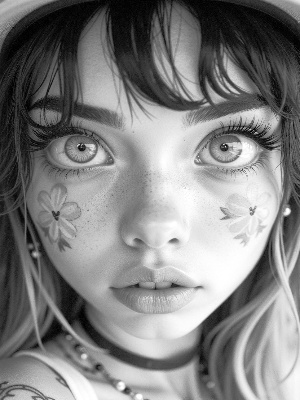

In [39]:
ipd.Image("./cv_seminar_2/img_cv2_eq_rgb.jpg")

### Применяем CLAHE

In [40]:
clahe_v1 = cv2.createCLAHE(clipLimit=2.0)
clahe_v2 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
clahe_v3 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16,16))
cl1 = clahe_v1.apply(img_cv2)
cl2 = clahe_v3.apply(img_cv2)
cl3 = clahe_v3.apply(img_cv2)
cl1_rgb = cv2.cvtColor(cl1, cv2.COLOR_GRAY2RGB)
cl2_rgb = cv2.cvtColor(cl2, cv2.COLOR_GRAY2RGB)
cl3_rgb = cv2.cvtColor(cl3, cv2.COLOR_GRAY2RGB)
cl1_rgb = cv2.resize(cl1_rgb, (300, 400))
cl2_rgb = cv2.resize(cl2_rgb, (300, 400))
cl3_rgb = cv2.resize(cl3_rgb, (300, 400))
cv2.imwrite("./cv_seminar_2/cl1_rgb.jpg", cl1_rgb)
cv2.imwrite("./cv_seminar_2/cl2_rgb.jpg", cl2_rgb)
cv2.imwrite("./cv_seminar_2/cl3_rgb.jpg", cl3_rgb)

True

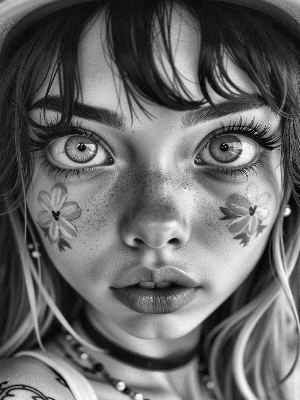

In [41]:
ipd.Image("./cv_seminar_2/cl1_rgb.jpg")

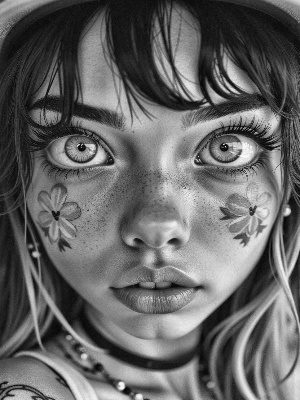

In [42]:
ipd.Image("./cv_seminar_2/cl2_rgb.jpg")

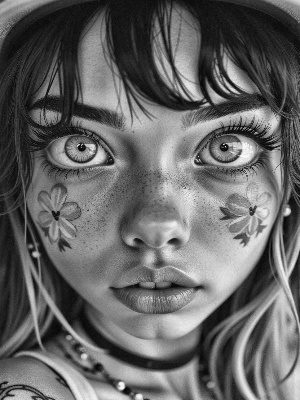

In [43]:
ipd.Image("./cv_seminar_2/cl3_rgb.jpg")

### Сравнение результатов

В общем идет выравнивание гистограммы не целиком, а по сеткам, правда я вообще глазом разницы не могу понять

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

## Задание 4. Фиксированная пороговая сегментация
1. Преобразовать изображение в градации серого.
2. Применить пороговую обработку с фиксированными значениями порога (50, 127, 200).
3. Визуально сравнить результаты и объяснить влияние порога на сегментацию.

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

### Загружаем картинку

In [44]:
download_image("https://image.civitai.com/xG1nkqKTMzGDvpLrqFT7WA/9a77af36-7cce-44ea-43e0-a114bf779b00/original=true,quality=90/163560.jpeg",
               "./cv_seminar_2",
               "example.jpg")

07:42:59-124168 INFO     Изображение сохранено: ./cv_seminar_2\example.jpg

In [45]:
img_cv2 = imgop("./cv_seminar_2/example.jpg", lib="cv2", show_jupyter=True, grayscale=True)

<IPython.core.display.HTML object>

In [46]:
ret_50, binary_50 = cv2.threshold(img_cv2, 50, 255, cv2.THRESH_BINARY)
ret_127, binary_127 = cv2.threshold(img_cv2, 127, 255, cv2.THRESH_BINARY)
ret_200, binary_200 = cv2.threshold(img_cv2, 200, 255, cv2.THRESH_BINARY)
binary_50 = cv2.resize(binary_50, (300, 400))
binary_127 = cv2.resize(binary_127, (300, 400))
binary_200 = cv2.resize(binary_200, (300, 400))
cv2.imwrite("./cv_seminar_2/binary_50.jpg", binary_50)
cv2.imwrite("./cv_seminar_2/binary_127.jpg", binary_127)
cv2.imwrite("./cv_seminar_2/binary_200.jpg", binary_200)

True

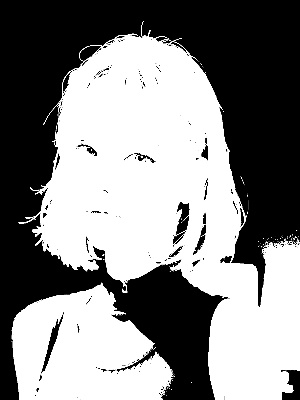

In [47]:
ipd.Image("./cv_seminar_2/binary_50.jpg")

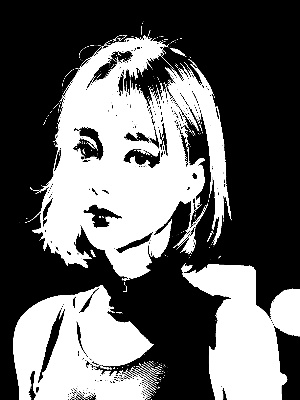

In [48]:
ipd.Image("./cv_seminar_2/binary_127.jpg")

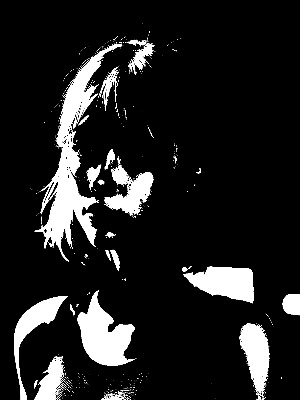

In [49]:
ipd.Image("./cv_seminar_2/binary_200.jpg")

### Сравнение

Фиксированная пороговая бинаризация заменяет пиксели на единицы, начиная с порога. </br>
Соотвественно чем больше пороговое значение, тем более высоким (ярким) значением должен обладать пиксель, чтобы не превратиться в нуль.

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

## Задание 5. Пороговая сегментация с Оцу
1. Преобразовать изображение в градации серого.
2. Применить метод Оцу для автоматического выбора порога.
3. Сравнить результат с фиксированным порогом из задания 4.

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

### Загружаем картинку

In [50]:
download_image("https://image.civitai.com/xG1nkqKTMzGDvpLrqFT7WA/65f6d3bc-9174-4561-a663-3c81809fe305/original=true,quality=90/38354652.jpeg",
               "./cv_seminar_2",
               "example.jpg")

07:42:59-729986 INFO     Изображение сохранено: ./cv_seminar_2\example.jpg

In [51]:
img_cv2 = imgop("./cv_seminar_2/example.jpg", lib="cv2", show_jupyter=True, grayscale=True)

<IPython.core.display.HTML object>

### Пороговая бинаризация по Оцу

In [52]:
ret, otsu_binary = cv2.threshold(img_cv2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [53]:
otsu_binary = cv2.resize(otsu_binary, (300, 400))
cv2.imwrite("./cv_seminar_2/otsu_binary.jpg", otsu_binary)

True

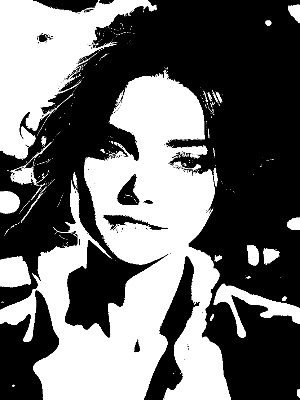

In [54]:
ipd.Image("./cv_seminar_2/otsu_binary.jpg")

### Сравнение

Порог получился в районе 127.

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

## Задание 6. Адаптивная пороговая обработка
1. Преобразовать изображение в градации серого.
2. Применить адаптивную пороговую обработку с методами `cv2.ADAPTIVE_THRESH_MEAN_C` и `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`.
3. Визуально сравнить результаты с методом Оцу.

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

### Загружаем картинку

In [55]:
download_image("https://image.civitai.com/xG1nkqKTMzGDvpLrqFT7WA/2a1a11c1-3022-49c0-bc26-de77af1abc07/original=true,quality=90/7227321.jpeg",
               "./cv_seminar_2",
               "example.jpg")

07:43:00-277935 INFO     Изображение сохранено: ./cv_seminar_2\example.jpg

In [56]:
img_cv2 = imgop("./cv_seminar_2/example.jpg", lib="cv2", show_jupyter=True, grayscale=True)

<IPython.core.display.HTML object>

### Адапативная + по Оцу

In [57]:
ret_otsu, otsu_binary = cv2.threshold(img_cv2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
mean_binary = cv2.adaptiveThreshold(
    img_cv2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=11, C=2
)
gaussian_binary = cv2.adaptiveThreshold(
    img_cv2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize=11, C=2
)
otsu_binary = cv2.resize(otsu_binary, (300, 400))
mean_binary = cv2.resize(mean_binary, (300, 400))
gaussian_binary = cv2.resize(gaussian_binary, (300, 400))
cv2.imwrite("./cv_seminar_2/otsu_binary.jpg", otsu_binary)
cv2.imwrite("./cv_seminar_2/mean_binary.jpg", mean_binary)
cv2.imwrite("./cv_seminar_2/gaussian_binary.jpg", gaussian_binary)

True

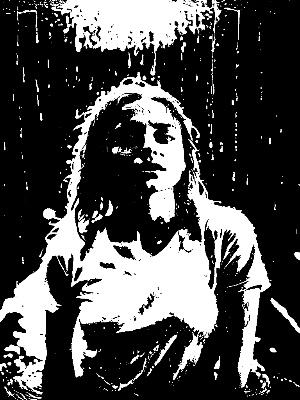

In [58]:
ipd.Image("./cv_seminar_2/otsu_binary.jpg")

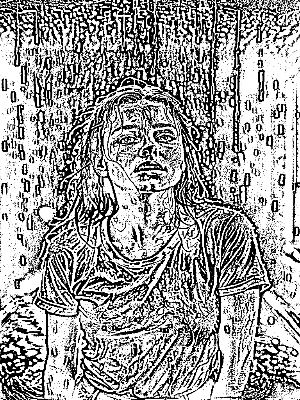

In [59]:
ipd.Image("./cv_seminar_2/mean_binary.jpg")

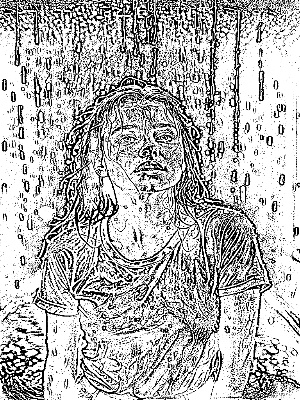

In [60]:
ipd.Image("./cv_seminar_2/gaussian_binary.jpg")

### Сравнение

Адаптивный порог как в случае с выравниваем гистограммы считает среднее/средневзвешенное значение порога </br>
для локальных областей изображения, в то время как Оцу автоматически вычисляет оптимальный порог для всего изображения.

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

## Задание 7. Простая кластеризация K-means
1. Считать цветное изображение и преобразовать его в формат LAB.
2. Выполнить кластеризацию K-means с количеством кластеров $k=3$.
3. Визуализировать результат кластеризации, показав области, соответствующие каждому кластеру.

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

### Загружаем картинку

In [61]:
download_image("https://image.civitai.com/xG1nkqKTMzGDvpLrqFT7WA/a2648c90-5852-4917-971c-1d43a6d3f2cc/original=true,quality=90/5228955.jpeg",
               "./cv_seminar_2",
               "example.jpg")

07:43:00-931773 INFO     Изображение сохранено: ./cv_seminar_2\example.jpg

In [62]:
img_cv2 = imgop("./cv_seminar_2/example.jpg", lib="cv2", show_jupyter=True)

<IPython.core.display.HTML object>

### Функция для кластеризации пикселей изображения

In [63]:
def imgclust(
    img: Union[np.ndarray, Image.Image],
    n_clusters: int = 5,
    color_space: str = "RGB",
    save_path: str = "./",
    show_jupyter: bool = False,
    lib: str = "cv2",
    max_iter: int = 100,
    tol: float = 1e-4,
    random_state: Optional[int] = None,
    channel: Optional[str] = None  # Новый аргумент
) -> Tuple[np.ndarray, np.ndarray]:
    
    # Словарь допустимых каналов
    valid_channels = {
        "RGB": ["R", "G", "B"],
        "HSV": ["H", "S", "V"],
        "LAB": ["L", "A", "B"],
        "GRAY": ["Gray"]
    }

    # Проверка параметров
    assert lib in ["cv2", "PIL"], log.error("Некорректная библиотека. Доступно: cv2, PIL.")
    assert color_space in valid_channels, log.error("Некорректное цветовое пространство.")
    assert n_clusters > 0, log.error("Количество кластеров должно быть положительным.")
    if channel is not None:
        assert channel in valid_channels[color_space], log.error((
            f"Некорректный канал '{channel}' для пространства {color_space}. "
            f"Допустимые каналы: {valid_channels[color_space]}"
        ))
    
    # Создание директории для сохранения
    os.makedirs(save_path, exist_ok=True)
    
    # Преобразование изображения
    original_img = None
    if isinstance(img, Image.Image):
        if lib == "cv2":
            img = np.array(img)
            if img.ndim == 3 and img.shape[2] == 4:
                img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
            original_img = img.copy()
        else:
            original_img = np.array(img.copy())
    elif lib == "cv2" and img.ndim == 3:
        original_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).copy()
    else:
        original_img = img.copy()
    
    # Конвертация цветового пространства
    converted_img = original_img.copy()
    convert_rgb = False
    if lib == "cv2":
        if color_space == "HSV":
            converted_img = cv2.cvtColor(original_img, cv2.COLOR_RGB2HSV)
            convert_rgb = True
        elif color_space == "LAB":
            converted_img = cv2.cvtColor(original_img, cv2.COLOR_RGB2LAB)
            convert_rgb = True
        elif color_space == "GRAY":
            converted_img = cv2.cvtColor(original_img, cv2.COLOR_RGB2GRAY)[:, :, np.newaxis]
    elif lib == "PIL":
        if color_space == "HSV":
            converted_img = Image.fromarray(original_img).convert("HSV")
            convert_rgb = True
        elif color_space == "LAB":
            converted_img = Image.fromarray(original_img).convert("LAB")
            convert_rgb = True
        elif color_space == "GRAY":
            converted_img = Image.fromarray(original_img).convert("L")
        converted_img = np.array(converted_img)
    
    # Извлечение конкретного канала
    working_img = converted_img.copy()
    channel_idx = None
    if channel is not None:
        channel_idx = valid_channels[color_space].index(channel)
        working_img = converted_img[:, :, channel_idx].copy()[:, :, np.newaxis]

    # Подготовка данных для кластеризации
    pixels = working_img.reshape(-1, 1 if (color_space == "GRAY" or channel is not None) else 3).astype(np.float32)

    # Применение K-Means
    kmeans = KMeans(
        n_clusters=n_clusters,
        max_iter=max_iter,
        tol=tol,
        random_state=random_state
    ).fit(pixels)
    
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # Создание кластеризованного изображения
    if channel is not None:
        # Создаем маску для замены только выбранного канала
        clustered_channel = centroids[labels].reshape(working_img.shape[:2])
        
        # Восстанавливаем исходное конвертированное изображение
        clustered_img = converted_img.copy()
        if color_space != "GRAY":
            clustered_img[:, :, channel_idx] = clustered_channel
        else:
            clustered_img = clustered_channel[:, :, np.newaxis]
    else:
        clustered_img = centroids[labels].reshape(working_img.shape)

    clustered_img = np.clip(clustered_img, 0, 255).astype(np.uint8)

    # Конвертация обратно в RGB
    if convert_rgb and color_space != "GRAY":
        if color_space == "HSV":
            clustered_img = cv2.cvtColor(clustered_img.astype(np.uint8), cv2.COLOR_HSV2RGB)
        elif color_space == "LAB":
            clustered_img = cv2.cvtColor(clustered_img.astype(np.uint8), cv2.COLOR_LAB2RGB)
    elif color_space == "GRAY":
        clustered_img = clustered_img.squeeze()

    # Визуализация
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    
    # Исходное изображение
    axes[0].imshow(original_img)
    axes[0].set_title("Исходное изображение")
    axes[0].axis('off')
    
    # Кластеризованное изображение
    display_img = clustered_img.copy()
    if color_space == "GRAY" or (channel is not None and color_space != "GRAY"):
        display_img = cv2.cvtColor(display_img, cv2.COLOR_RGB2BGR) if lib == "cv2" else display_img
        axes[1].imshow(display_img, cmap='gray' if color_space == "GRAY" else None)
    else:
        axes[1].imshow(display_img)

    mask = display_img
        
    title = f"Кластеризация ({color_space}"
    if channel:
        title += f", канал {channel}"
    title += f", {n_clusters} кластеров)"
    axes[1].set_title(title)
    axes[1].axis('off')
    
    plt.tight_layout()
    
    # Сохранение
    clust_path = os.path.join(save_path, f"clust_{color_space}_{n_clusters}{'_' + channel if channel else ''}.png")
    plt.savefig(clust_path, bbox_inches='tight')
    plt.close()
    
    if show_jupyter:
        from IPython import display
        display.display(display.HTML(f'<img src="{clust_path}" width="800">'))
    
    return centroids, labels, mask

In [64]:
centroids, labels, mask = imgclust(img_cv2, n_clusters=3, lib="cv2", save_path="./cv_seminar_2", color_space="LAB", show_jupyter=True, random_state=17)

  File "C:\Users\NightMare\PycharmProjects\CVtools\venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\NightMare\anaconda3\envs\envGPU\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\NightMare\anaconda3\envs\envGPU\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\NightMare\anaconda3\envs\envGPU\lib\subprocess.py", line 1420, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


<IPython.core.display.HTML object>

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

## Задание 8. Сравнение кластеризации в разных цветовых пространствах
1. Выполнить кластеризацию K-means для одного и того же изображения в пространствах RGB и LAB.
2. Установить $k=4$.
3. Сравнить визуальные результаты и сделать выводы, в каком пространстве кластеры лучше разделены.

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

### Загружаем картинку

In [65]:
download_image("https://image.civitai.com/xG1nkqKTMzGDvpLrqFT7WA/582f38a4-3c74-460b-8e3d-61a66fc2f0c1/original=true,quality=90/50198615.jpeg",
               "./cv_seminar_2",
               "example.jpg")

07:43:02-695214 INFO     Изображение сохранено: ./cv_seminar_2\example.jpg

In [66]:
img_cv2 = imgop("./cv_seminar_2/example.jpg", lib="cv2", show_jupyter=True)

<IPython.core.display.HTML object>

### Кластеризация для LAB

In [67]:
centroids, labels, mask = imgclust(img_cv2, n_clusters=4, lib="cv2", save_path="./cv_seminar_2", color_space="LAB", show_jupyter=True, random_state=17)

<IPython.core.display.HTML object>

### Кластеризация для RGB

In [68]:
centroids, labels, mask = imgclust(img_cv2, n_clusters=4, lib="cv2", save_path="./cv_seminar_2", color_space="RGB", show_jupyter=True, random_state=17)

<IPython.core.display.HTML object>

### Сравнение

В формате RGB получилось выделить кластеры лучше, можно заметить на лице в варианте LAB есть светлые полосы.
На изображении с множеством оттенков (например, пейзаж) кластеризация в LAB будет лучше выделять области с разными цветами, даже если они имеют схожую яркость.
В RGB такие области могут быть объединены в один кластер из-за схожих интенсивностей в каналах.

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

## Задание 9. Использование каналов для кластеризации
1. Выделить только канал Hue из HSV.
2. Выполнить кластеризацию K-means с $k=3$ для значений Hue.
3. Визуализировать результат кластеризации, интерпретируя выделенные цветовые зоны.

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

### Загружаем картинку

In [69]:
download_image("https://image.civitai.com/xG1nkqKTMzGDvpLrqFT7WA/c5749e06-9bdb-465d-9237-76e335caa37b/original=true,quality=90/49112280.jpeg",
               "./cv_seminar_2",
               "example.jpg")

07:43:04-768054 INFO     Изображение сохранено: ./cv_seminar_2\example.jpg

In [70]:
img_cv2 = imgop("./cv_seminar_2/example.jpg", lib="cv2", show_jupyter=True)

<IPython.core.display.HTML object>

In [71]:
centroids, labels, mask = imgclust(img_cv2, n_clusters=3, lib="cv2", save_path="./cv_seminar_2", color_space="HSV", channel="H", show_jupyter=True, random_state=17)

<IPython.core.display.HTML object>

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

## Задание 10. Сегментация объекта с использованием кластеризации
1. Считать изображение, содержащее объект на сложном фоне.
2. Выполнить кластеризацию K-means с $k=2$ в пространстве LAB.
3. Выделить объект, сопоставив кластеры с исходным изображением.

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

### Загружаем картинку

In [72]:
download_image("https://image.civitai.com/xG1nkqKTMzGDvpLrqFT7WA/525e7465-6bd7-47e2-983e-c39654367301/original=true,quality=90/53040736.jpeg",
               "./cv_seminar_2",
               "example.jpg")

07:43:06-511978 INFO     Изображение сохранено: ./cv_seminar_2\example.jpg

In [73]:
img_cv2 = imgop("./cv_seminar_2/example.jpg", lib="cv2", show_jupyter=True)

<IPython.core.display.HTML object>

### Выделяем кластеры

In [74]:
centroids, labels, mask = imgclust(img_cv2, n_clusters=2, lib="cv2", save_path="./cv_seminar_2", color_space="LAB", show_jupyter=True, random_state=17)

<IPython.core.display.HTML object>

### Накладываем маску на исходное изображение

In [75]:
def maskimg(image_path, n_clusters, cluster_idx, colors, centroids, labels, mask):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Ошибка загрузки изображения. Проверьте путь к файлу.")
    if mask.ndim == 3:
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    new_mask = np.zeros((*mask.shape, 3), dtype=np.uint8)
    for i, color in enumerate(colors):
        new_mask[mask == i] = color  # color должен быть в BGR
    binary_mask = np.zeros_like(mask, dtype=np.uint8)
    binary_mask[mask == cluster_idx] = 255
    binary_mask = cv2.resize(binary_mask, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)
    masked_img = cv2.bitwise_and(img, img, mask=binary_mask)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Исходное изображение")
    axes[0].axis('off')
    axes[1].imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))
    axes[1].set_title("Выделенный объект")
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()

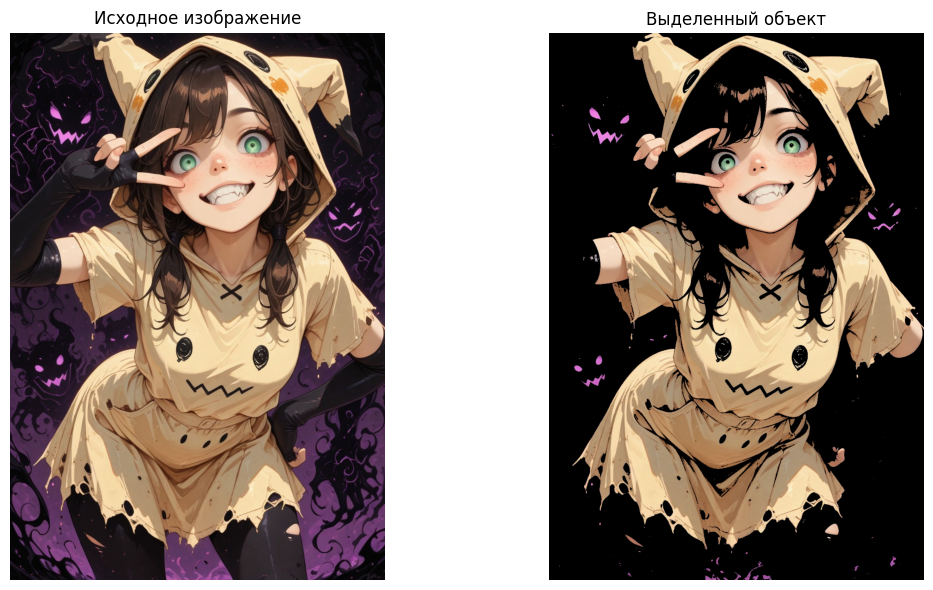

In [76]:
maskimg(
    image_path="./cv_seminar_2/example.jpg",
    n_clusters=2,
    cluster_idx=159,
    colors=[[255, 0, 0], [0, 0, 255]],  # Красный и синий в BGR
    centroids=centroids,
    labels=labels,
    mask=mask
)

# Выводы

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

<pre style="background-color: #888888; padding: 10px; border-radius: 5px; font-family: monospace;">
    <span style="color: white;">
        1. Очередной раз налюбовались красивыми виртуальными женщинами.
        2. Разобрались с кластеризацией изображений.
    </span>
</pre>

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">